# **Malaria Detection**

##<b>Problem Definition</b>



**The context:** Why is this problem important to solve?<br>
Malaria is a global health issue that affects millions of people, particularly in regions with limited access to healthcare resources. Early and accurate detection of malaria is crucial for effective treatment and prevention of complications. However, traditional laboratory diagnosis methods for malaria are time-consuming, require specialized expertise, and may suffer from inter-observer variability. By developing an automated system for malaria detection using computer vision and deep learning techniques, we can significantly improve the speed, accuracy, and accessibility of diagnosis. This can lead to earlier detection, prompt treatment, and ultimately save lives.


**The objectives:** What is the intended goal?<br>
The goal of this project is to build a computer vision model using deep learning algorithms that can accurately identify and classify red blood cells as parasitized (infected with the Plasmodium parasite) or uninfected (free of the parasite). The model should provide a reliable and efficient tool for malaria detection, enabling early diagnosis and timely intervention.

**The key questions:** What are the key questions that need to be answered?<br>

1.   How can we leverage machine learning and artificial intelligence techniques to automate malaria detection?

  * Answer: We can pass the picture of red blood cells of a patient to a artificial intelligence system where it will process and determine whether the patient is having malaria decease or not using machine learning classification technique

2.   What are the key features or patterns in the images of red blood cells that can distinguish between infected and uninfected cells?
  * Answer: Circular kind of shaped purple color spot in the red blood cell region

3.   Which deep learning algorithms and computer vision techniques are most suitable for this task?
  * Answer: Binary classifier based on ANN or more specifically CNN

4.   How can we evaluate the performance of the developed model in terms of accuracy, precision, recall, and other relevant metrics?
  * Answer: Since this is a binary classification problem, can find the TP, FP, TN and FN values then we can evaluate the metrics values(accuracy, precision, recall and confusion matrix) and see which model is performing out of the box using these metrics(Closely near to 1)


**The problem formulation:** What is it that we are trying to solve using data science?
Using data science, we aim to develop an efficient computer vision model that can accurately detect malaria by analyzing images of red blood cells. The model will be trained to differentiate between infected (parasitized) and uninfected red blood cells, based on visual patterns and features present in the images. The goal is to build a robust and reliable system that can automate the detection process, reducing the reliance on manual inspection and improving diagnostic accuracy. By leveraging machine learning and artificial intelligence techniques, we can enable early and accurate malaria diagnosis, particularly in resource-constrained areas where access to skilled healthcare professionals may be limited.




## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>

## <b>Start of the Screening </b>

Follow the general steps below to achieve the objective of this project.

###<b> Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory

### <b>Load and reformat the data</b>

In [ ]:
base_image_path = '/content/drive/MyDrive/cell_images'

train_image_path = base_image_path + '/train'

test_image_path = base_image_path + '/test'

In [ ]:
train_data = image_dataset_from_directory(train_image_path, image_size=(112, 112), batch_size=64)

Found 24958 files belonging to 2 classes.


In [ ]:
test_data = image_dataset_from_directory(test_image_path, image_size=(112, 112), batch_size=64)

Found 2600 files belonging to 2 classes.


###<b> Check the shape of train and test images

In [ ]:
train_data_iter = train_data.as_numpy_iterator()
train_data_batch = train_data_iter.next()

test_data_iter = test_data.as_numpy_iterator()
test_data_batch = test_data_iter.next()

In [ ]:
train_data_batch[0].shape

(64, 112, 112, 3)

In [ ]:
test_data_batch[0].shape

(64, 112, 112, 3)

###<b> Check the shape of train and test labels

In [ ]:
train_data_batch[1].shape

(64,)

In [ ]:
test_data_batch[1].shape

(64,)

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
np.min(train_data_batch[0])

0.0

In [ ]:
np.max(train_data_batch[0])

236.16406

In [ ]:
np.min(test_data_batch[0])

0.0

In [ ]:
np.max(test_data_batch[0])

239.00343

###<b> Count the number of values in both uninfected and parasitized

In [ ]:
data_counts = {}
for directory in os.listdir(train_image_path):
  count = len(os.listdir(os.path.join(train_image_path, directory)))
  data_counts[directory] = count
  print (directory + ' -> ' + str(count))

parasitized -> 12582
uninfected -> 12376


###<b>Normalize the images

In [ ]:
train_data_normalized = train_data.map(lambda x, y: (x/255, y))
test_data_normalized = test_data.map(lambda x, y: (x/255, y))

###<b> Plot to check if the data is balanced

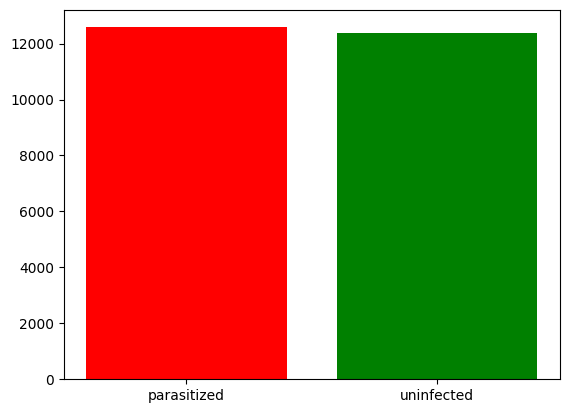

In [ ]:
plt.bar(range(len(data_counts)), list(data_counts.values()), align='center', color=['red', 'green'])
plt.xticks(range(len(data_counts)), list(data_counts.keys()))
plt.show()

### <b>Data Exploration</b>
Visualize the images from the train data

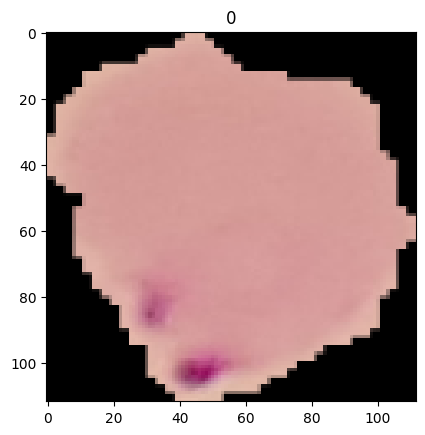

In [ ]:
plt.imshow(train_data_batch[0][0].astype(int))
plt.title(train_data_batch[1][0])
plt.show()

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

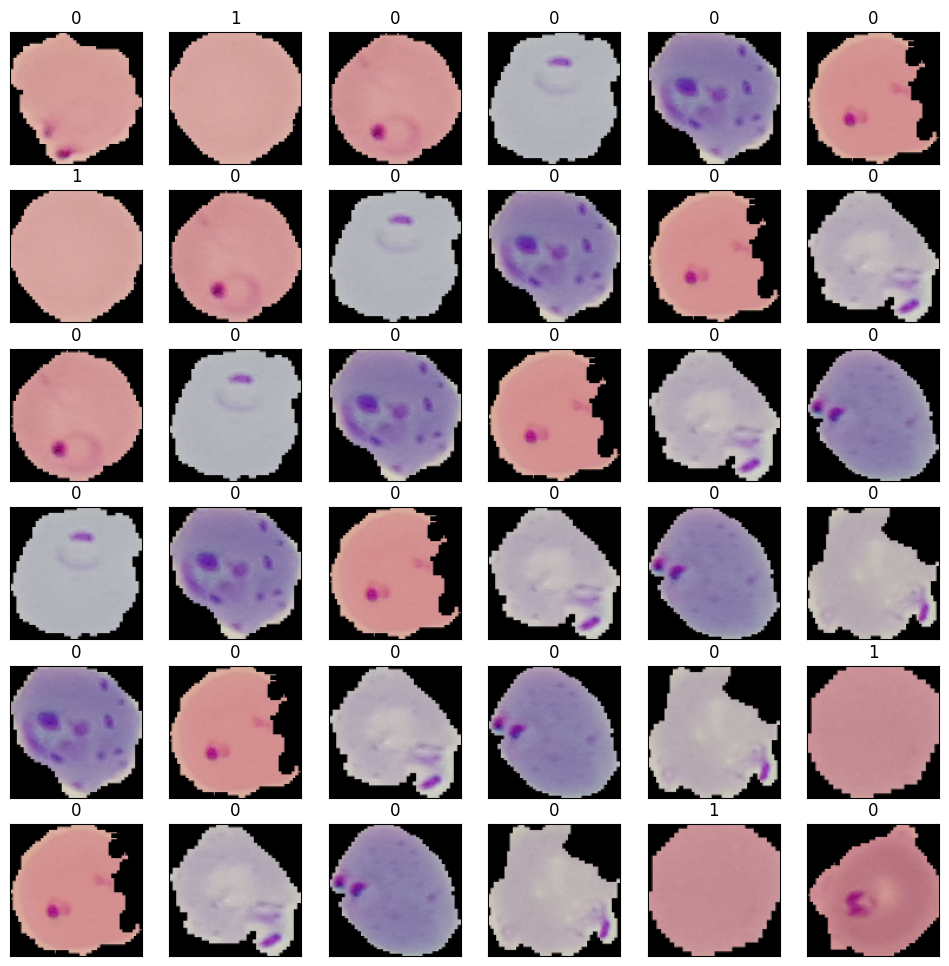

In [ ]:
fig, ax = plt.subplots(6, 6, figsize=(12, 12))

for i in range(6):
  for j in range(6):
    ax[i, j].imshow(train_data_batch[0][i+j].astype(int))
    ax[i, j].set_title(train_data_batch[1][i+j])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

###<b> Plotting the mean images for parasitized and uninfected

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
train_data_converted = []
train_label = []

count = 0
for data, label in train_data:
  for i in range(data.shape[0]):
    count += 1
    train_data_converted.append(cv.cvtColor(np.array(data[i]), cv.COLOR_BGR2HSV))
    train_label.append(int(label[i]))
  if (count > 10000):
    break
  print (count)

64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
1024
1088
1152
1216
1280
1344
1408
1472
1536
1600
1664
1728
1792
1856
1920
1984
2048
2112
2176
2240
2304
2368
2432
2496
2560
2624
2688
2752
2816
2880
2944
3008
3072
3136
3200
3264
3328
3392
3456
3520
3584
3648
3712
3776
3840
3904
3968
4032
4096
4160
4224
4288
4352
4416
4480
4544
4608
4672
4736
4800
4864
4928
4992
5056
5120
5184
5248
5312
5376
5440
5504
5568
5632
5696
5760
5824
5888
5952
6016
6080
6144
6208
6272
6336
6400
6464
6528
6592
6656
6720
6784
6848
6912
6976
7040
7104
7168
7232
7296
7360
7424
7488
7552
7616
7680
7744
7808
7872
7936
8000
8064
8128
8192
8256
8320
8384
8448
8512
8576
8640
8704
8768
8832
8896
8960
9024
9088
9152
9216
9280
9344
9408
9472
9536
9600
9664
9728
9792
9856
9920
9984


###<b> Converting the test data

In [ ]:
test_data_converted = []
test_label = []

for data, label in test_data:
  for i in range(data.shape[0]):
    test_data_converted.append(cv.cvtColor(np.array(data[i]), cv.COLOR_BGR2HSV))
    test_label.append(int(label[i]))

###<b> Processing Images using Gaussian Blurring


###<b> Gaussian Blurring on train data

In [ ]:
train_data_blurred = []

for data in train_data_converted:
  train_data_blurred.append(cv.GaussianBlur(data, (5,5),cv.BORDER_DEFAULT))

###<b> Gaussian Blurring on test data

In [ ]:
test_data_blurred = []

for data in test_data_converted:
  test_data_blurred.append(cv.GaussianBlur(data, (5,5),cv.BORDER_DEFAULT))

## **Model Building**

### **Base Model**

**Note:** Build 3-5 models with  CNN architectures. Use custom or pretrained models of your choice. Start with a base model and continue from there

###<b> Importing the required libraries for building and training our base Model

In [ ]:
from tensorflow import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

####<B>One Hot Encoding the train and test labels

In [ ]:
train_onehot_label = np.array(one_hot(train_label, 2))
test_onehot_label = np.array(one_hot(test_label, 2))

###<b> Building the model

In [ ]:
base_model = Sequential()

base_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(112, 112, 3)))
base_model.add(MaxPooling2D())
base_model.add(Conv2D(16, (3,3), 1, activation='relu'))
base_model.add(MaxPooling2D())
base_model.add(Conv2D(16, (3,3), 1, activation='relu'))
base_model.add(MaxPooling2D())
base_model.add(Conv2D(16, (3,3), 1, activation='relu'))
base_model.add(Flatten())
base_model.add(Dense(256, activation='relu'))
base_model.add(Dense(128, activation='relu'))
base_model.add(Dense(10, activation='relu'))
base_model.add(Dense(1, activation='sigmoid'))

###<b> Compiling the model

In [ ]:
base_model.compile(optimizer='SGD', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0

<b> Using Callbacks

In [ ]:
my_callbacks = [EarlyStopping(patience=2), ModelCheckpoint(filepath='base_model.{epoch:02d}-{val_loss:.2f}.h5'), TensorBoard(log_dir='./logs')]

<b> Fit and train our Model

In [ ]:
base_history = base_model.fit(np.array(train_data_blurred), np.array(train_label), validation_split = 0.2, epochs=20, callbacks=my_callbacks)

Epoch 1/20
252/252 [==============================] - 55s 213ms/step - loss: 1.1162 - accuracy: 0.5134 - val_loss: 0.6912 - val_accuracy: 0.5438
Epoch 2/20
252/252 [==============================] - 50s 199ms/step - loss: 0.6900 - accuracy: 0.5341 - val_loss: 0.6925 - val_accuracy: 0.5114
Epoch 3/20
252/252 [==============================] - 51s 200ms/step - loss: 0.6885 - accuracy: 0.5564 - val_loss: 0.6882 - val_accuracy: 0.5781
Epoch 4/20
252/252 [==============================] - 51s 202ms/step - loss: 0.6863 - accuracy: 0.5734 - val_loss: 0.6859 - val_accuracy: 0.5766
Epoch 5/20
252/252 [==============================] - 49s 194ms/step - loss: 0.6836 - accuracy: 0.5831 - val_loss: 0.6849 - val_accuracy: 0.5831
Epoch 6/20
252/252 [==============================] - 49s 194ms/step - loss: 0.6817 - accuracy: 0.5840 - val_loss: 0.6852 - val_accuracy: 0.5682
Epoch 7/20
252/252 [==============================] - 52s 208ms/step - loss: 0.6777 - accuracy: 0.5977 - val_loss: 0.6816 - val_ac

###<b> Evaluating the model on test data

In [ ]:
base_predict = base_model.predict(np.array(test_data_blurred))

base_predict_regulated = list(map(lambda value: 1 if (value >= 0.5) else 0, base_predict))

82/82 [==============================] - 4s 51ms/step


<b> Plotting the confusion matrix

In [ ]:
confusion_matrix(test_label, base_predict_regulated)

array([[504, 796],
       [310, 990]])

In [ ]:
base_classification_report = classification_report(test_label, base_predict_regulated)

print (base_classification_report)

              precision    recall  f1-score   support

           0       0.62      0.39      0.48      1300
           1       0.55      0.76      0.64      1300

    accuracy                           0.57      2600
   macro avg       0.59      0.57      0.56      2600
weighted avg       0.59      0.57      0.56      2600



<b>Plotting the train and validation curves

In [ ]:
base_history.history

{'loss': [1.1162210702896118,
  0.6899749040603638,
  0.6885276436805725,
  0.6863388419151306,
  0.6835545301437378,
  0.681735634803772,
  0.6776823401451111,
  0.672404408454895,
  0.6702710390090942,
  0.6650350689888,
  0.660540759563446,
  0.6571958065032959,
  0.6529301404953003],
 'accuracy': [0.5134361982345581,
  0.5340880751609802,
  0.5563573241233826,
  0.5734013319015503,
  0.5831052660942078,
  0.5839760899543762,
  0.5976611375808716,
  0.6010201573371887,
  0.6073650121688843,
  0.6160736680030823,
  0.623786985874176,
  0.6244090795516968,
  0.623911440372467],
 'val_loss': [0.6912245750427246,
  0.692466139793396,
  0.6881971955299377,
  0.6859171390533447,
  0.6849104762077332,
  0.6852461099624634,
  0.6815530061721802,
  0.6810827255249023,
  0.6750670671463013,
  0.6713221669197083,
  0.6703434586524963,
  0.6743074655532837,
  0.6716910600662231],
 'val_accuracy': [0.5437811017036438,
  0.5114427804946899,
  0.5781094431877136,
  0.5766169428825378,
  0.58308458

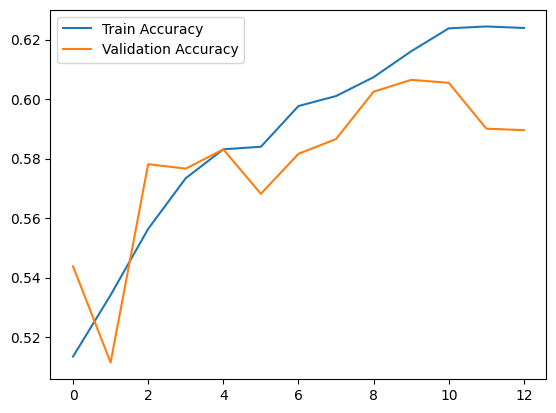

In [ ]:
plt.plot([i for i in range(len(base_history.history['accuracy']))], base_history.history['accuracy'], label='Train Accuracy')
plt.plot([i for i in range(len(base_history.history['val_accuracy']))], base_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc="best")
plt.show()

###<b> Model 1
####<b> Try to improve the performance of our model by tuning hyperparameters or building a different model using other techniques


###<b> Building the Model

In [ ]:
model1 = Sequential()

model1.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(112, 112, 3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(32, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(32, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(64, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(128, (3,3), 1, activation='relu'))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

###<b> Compiling the model

In [ ]:
model1.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 110, 110, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)      

<b> Using Callbacks

In [ ]:
my_callbacks = [EarlyStopping(patience=2), ModelCheckpoint(filepath='model_one.{epoch:02d}-{val_loss:.2f}.h5'), TensorBoard(log_dir='./logs')]

<b>Fit and Train the model





In [ ]:
history1 = model1.fit(np.array(train_data_blurred), np.array(train_label), validation_split = 0.2, epochs=20, callbacks=my_callbacks)

Epoch 1/20
 92/252 [=========>....................] - ETA: 36s - loss: 1.3089 - accuracy: 0.4942

###<b> Evaluating the model

In [ ]:
predict1 = model1.predict(np.array(test_data_blurred))

predict1_regulated = list(map(lambda value: 1 if (value >= 0.5) else 0, predict1))

<b> Plotting the confusion matrix

In [ ]:
confusion_matrix(test_label, predict1_regulated)

In [ ]:
model1_classification_report = classification_report(test_label, predict1_regulated)

print (model1_classification_report)

<b> Plotting the train and the validation curves

In [ ]:
history1.history

In [ ]:
plt.plot([i for i in range(len(history1.history['accuracy']))], history1.history['accuracy'], label='Train Accuracy')
plt.plot([i for i in range(len(history1.history['val_accuracy']))], history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc="best")
plt.show()

###<b> Model 2
####<b> Try to improve the performance of our model by tuning hyperparameters or building a different model using other techniques such as Augmentation, Batch Normalization, etc

###<b> Use image data generator if augmentation is used

In [ ]:
datagen = ImageDataGenerator (
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

datagen.fit(train_data_blurred)

####<B>Visualizing images

###<b>Building the Model

In [ ]:
# Added Drop out to dense/fully connected layers to prevent over fitting

model2 = Sequential()

model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(112, 112, 3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(128, (3,3), 1, activation='relu'))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

<b>Using Callbacks

In [ ]:
model2.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

In [ ]:
my_callbacks = [EarlyStopping(patience=2), ModelCheckpoint(filepath='model_two.{epoch:02d}-{val_loss:.2f}.h5'), TensorBoard(log_dir='./logs')]

<b> Fit and Train the model

In [ ]:
data_set = datagen.flow(np.array(train_data_blurred), np.array(train_label), batch_size=32)

history2 = model2.fit(data_set, epochs=3, callbacks=my_callbacks)

###<B>Evaluating the model

In [ ]:
predict2 = model2.predict(np.array(test_data_blurred))

predict2_regulated = list(map(lambda value: 1 if (value >= 0.5) else 0, predict2))

<b>Plot the train and validation accuracy

In [ ]:
history2.history

In [ ]:
plt.plot([i for i in range(len(history2.history['accuracy']))], history2.history['accuracy'], label='Train Accuracy')
plt.plot([i for i in range(len(history2.history['val_accuracy']))], history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc="best")
plt.show()

<B>Plotting the classification report and confusion matrix

In [ ]:
confusion_matrix(test_label, predict2_regulated)

In [ ]:
model2_classification_report = classification_report(test_label, predict2_regulated)

print (model2_classification_report)

### **Model 3: Use a Pre-trained model (VGG16) or other**
- Import VGG16 or another pre-trained model upto any layer you choose
- Add Fully Connected Layers on top of it

###<b>Compiling the model

<b> using callbacks

<b>Fit and Train the model

<b>Plot the train and validation accuracy

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?




###<b> Evaluating the model

<b>Plotting the classification report and confusion matrix

####<b> Observations and Conclusions drawn from the final model:
  * Base model is working as a random guesser(Base model basically classifies infected -> uninfected most of the times and uninfected will be mostly cateogorized into that). Model 1 will perform better than Base model since having more convolution layer and Model 2 may even perform better due to drop out regularization and hyperparamater techniques have been applied <b>








**Improvements that can be done:**<br>


*  **Can the model performance be improved using other pre-trained models or different CNN architecture?**
  * Yes, deep convolutional neural network or pretrained models like VGG or Inception or Resnet will perform better


*  **Use other filtering or other techniques to improve performance, if you would like**
  * Changing from RGB to HSV is having an impact of the performance of model. So such kind of image preprocessing technique will help deep learning models to learn better and quicker. Some of the image processing techniques to play with are, thresholding and average filtering



#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
  *

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
  * Deepened layers and Augmentation will have a huge impact in increasing the accuracy
  * Further improvements: Hyper parameter tuning with various number of layers, weight initiliatization, learning rate and optimizer


####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
  * Model 2 will be best in my point of view
  * Reasons: Performance metrics wise Model 2 and Pre trained models will be nearly same but considering resource and time consumptions in inference/production, Model 2 will be better(Pre trained models will take more resources since the layers/paramaters are high)


In [ ]:
# 0 label denotes Parasitized/Infected
# 1 label denotes Uninfected